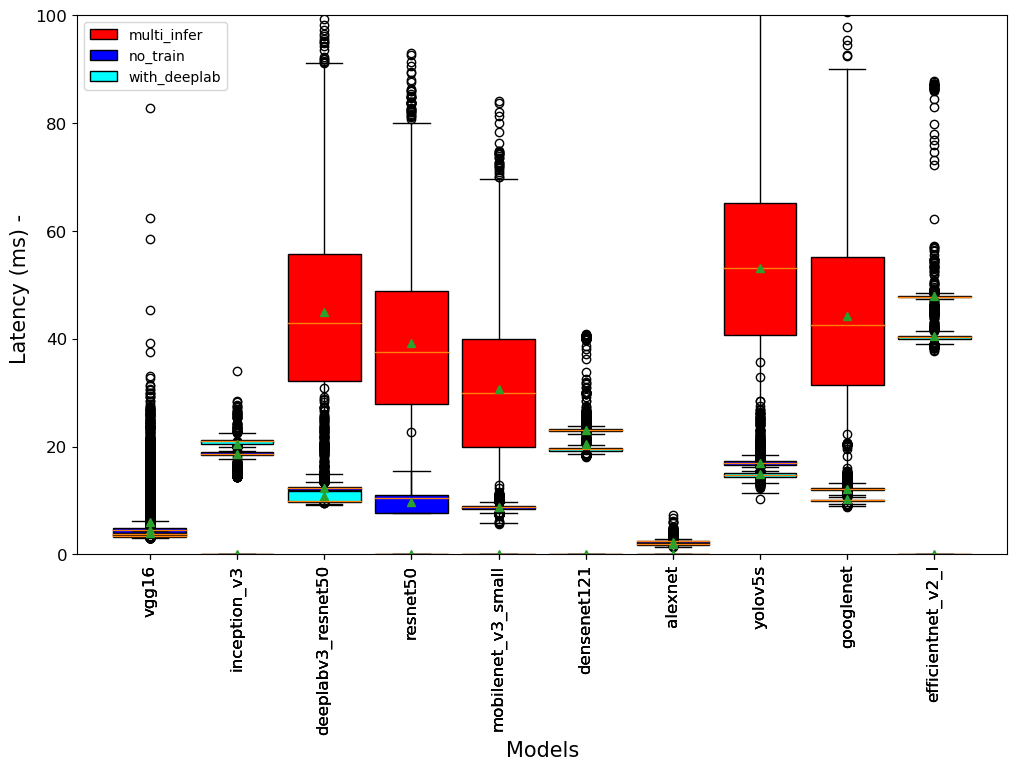

In [8]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cols = ['vgg16','inception_v3','deeplabv3_resnet50','resnet50',\
        'mobilenet_v3_small','densenet121','alexnet','yolov5s','googlenet','efficientnet_v2_l']

def load_data(mode_path): # mode: no_train, multi-infer,...
    data=pd.DataFrame(columns =cols)
    for i , file_name in enumerate(os.listdir(mode_path)):    
        prefix, model_name, suffix = re.findall(r'(infer_log).+infer_(.+)_[0-9]+(.+)',file_name)[0]
        if prefix and suffix=='.csv':  # filter unnecessary files
            fl_path =os.path.join(mode_path, file_name)
            df = pd.read_csv(fl_path)['latency']
            data[model_name] = df
            data=data.fillna(0)
    return data

def plot_box(data,mode,fill_color):
    col=cols
    plot_interval =0.5
    for i in range(len(col)):
        y= data[col[i]]
        bp = ax.boxplot(y, widths= plot_interval, positions = [i*(plot_interval+0.1)],\
                        labels = [col[i]],showmeans=True, patch_artist=True,)
        for patch in bp['boxes']:  ## props: ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']
            patch.set(facecolor=fill_color)   
    plt.xticks(fontsize= 12, rotation = 90)  #set label size
    plt.yticks(fontsize= 12)  #set label size
# #     median, mean = np.median(y), np.mean(y)
# #     plt.text(i*(plot_interval+0.1)+0.05,median*1, '%0.1f'%median, color= 'brown')#     
    plt.ylim(0, 100)
    return bp["boxes"][0] # return box for ploting

## main
root = '/home/royliu/Documents/profile_train_infer/result/data/10rps'
fill_colors=['red','blue','cyan']
fig, ax = plt.subplots(1,1, figsize=(12,7))
mode_list = []
bp_box_list =[]
for i, mode in enumerate(os.listdir(root)):
    mode_path = os.path.join(root,mode)
    data=pd.DataFrame(columns =cols)
    fill_color = fill_colors[i]
    data =load_data(mode_path)
    bx= plot_box(data, mode,fill_color)
    bp_box_list.append(bx)
    mode_list.append(mode)
    
plt.legend(bp_box_list,mode_list, loc = 'best')
plt.xlabel('Models', fontsize= 15)
plt.ylabel('Latency (ms) - ', fontsize= 15) 
plt.show()



In [9]:
col = 'vgg16'
p = 0.99
def percentile(data, p, col):
    lt = data[col].to_list()
    lt = sorted(lt)
    res =lt[int(perc_tl*len(lt))]
    return res
res = percentile(data, p)
res

9.828736305236816

In [41]:
data

,vgg16,inception_v3,deeplabv3_resnet50,resnet50,mobilenet_v3_small,densenet121,alexnet,yolov5s,googlenet,efficientnet_v2_l
0,5.892512,28.370144,18.640064,0,0,31.080223,2.842784,21.662687,19.567039,46.505825
1,3.498912,19.579103,11.758304,0,0,19.696417,1.829056,14.937504,9.639232,39.890495
2,3.488160,19.172735,9.560736,0,0,19.664192,1.830560,14.218912,10.170752,41.266273
3,3.405856,19.012993,9.735360,0,0,19.678144,1.848128,14.382112,10.154272,40.836544
4,6.442496,21.321888,9.757120,0,0,19.243616,1.826560,14.447104,10.221024,39.693344
...,...,...,...,...,...,...,...,...,...,...
6015,3.720832,20.832607,9.809408,0,0,18.898527,1.802912,13.969824,9.788896,40.597248
6016,3.771424,21.056192,9.816960,0,0,19.043455,1.801280,14.966432,10.094528,39.106850
6017,3.913824,21.216192,9.690048,0,0,19.460735,1.788160,15.167136,10.130016,40.505825
6018,3.985088,21.289312,9.754016,0,0,19.689440,1.705888,14.025824,10.066944,40.465504


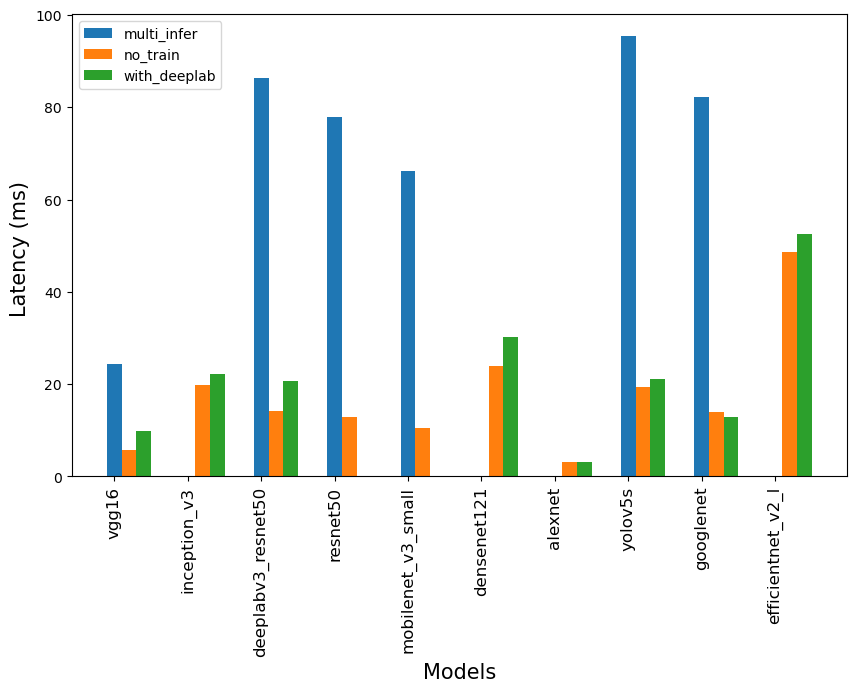

In [40]:
## bar plot
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cols = ['vgg16','inception_v3','deeplabv3_resnet50','resnet50',\
        'mobilenet_v3_small','densenet121','alexnet','yolov5s','googlenet','efficientnet_v2_l']

def load_data(mode_path): # mode: no_train, multi-infer,...
    data=pd.DataFrame(columns =cols)
    for i , file_name in enumerate(os.listdir(mode_path)):    
        prefix, model_name, suffix = re.findall(r'(infer_log).+infer_(.+)_[0-9]+(.+)',file_name)[0]
        if prefix and suffix=='.csv':  # filter unnecessary files
            fl_path =os.path.join(mode_path, file_name)
            df = pd.read_csv(fl_path)['latency']
            data[model_name] = df
            data=data.fillna(0)
    return data

def percentile(data, p, col):
    lt = data[col]
    lt = sorted(lt)
    res =lt[int(perc_tl*len(lt))]
#     print(res)
    return res

root = '/home/royliu/Documents/profile_train_infer/result/data/10rps'
fill_colors=['red','blue','cyan']
fig, ax = plt.subplots(1,1, figsize=(10,6))
mode_list = []
bp_box_list =[]
res_list =[]
value_type = 'mean'
p =0.5
def plot_bar(data, cols, p):
    res_list = []
    col=cols
    for model in col:
        y = data[model].to_list()
        res = percentile(data, p, model)
        res_list.append(res)

    x_axis= np.arange(len(col))  
    plt.bar(x_axis+i*.2, res_list, width =0.2, label=mode) 
    mode_list.append(mode)

## main
for i, mode in enumerate(os.listdir(root)):
    medians, means = [], []
    mode_path = os.path.join(root,mode)
    data=pd.DataFrame(columns =cols)
    fill_color = fill_colors[i]
    data =load_data(mode_path)
    plot_bar(data, cols, p)

x_axis= np.arange(len(cols))  
plt.xticks(x_axis, cols, fontsize= 12, rotation = 90)
plt.xlabel('Models', fontsize= 15)
plt.ylabel('Latency (ms) ', fontsize= 15) 
plt.legend(mode_list, loc=2)
plt.show()

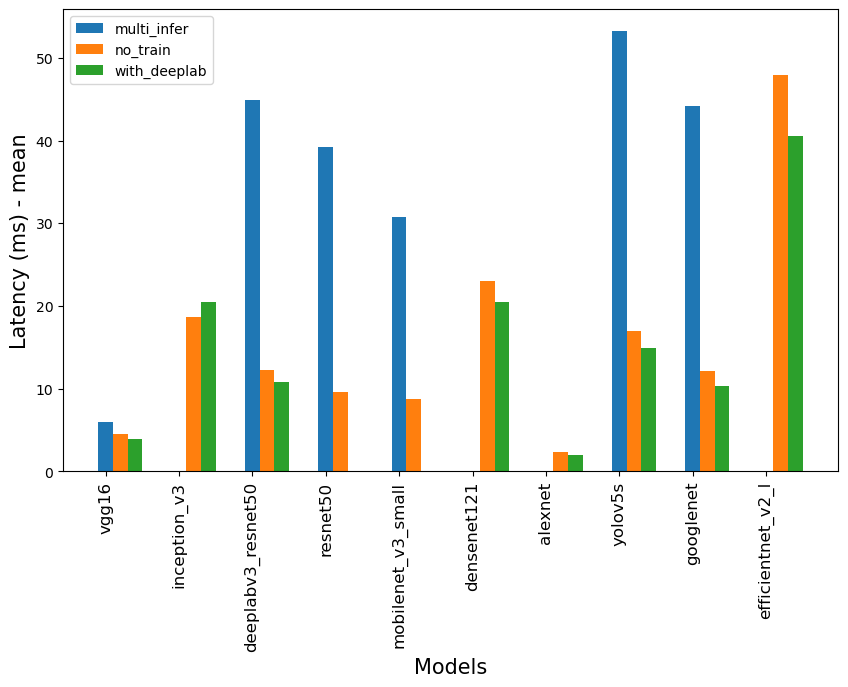

In [4]:
## bar plot
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cols = ['vgg16','inception_v3','deeplabv3_resnet50','resnet50',\
        'mobilenet_v3_small','densenet121','alexnet','yolov5s','googlenet','efficientnet_v2_l']

def load_data(mode_path): # mode: no_train, multi-infer,...
    data=pd.DataFrame(columns =cols)
    for i , file_name in enumerate(os.listdir(mode_path)):    
        prefix, model_name, suffix = re.findall(r'(infer_log).+infer_(.+)_[0-9]+(.+)',file_name)[0]
        if prefix and suffix=='.csv':  # filter unnecessary files
            fl_path =os.path.join(mode_path, file_name)
            df = pd.read_csv(fl_path)['latency']
            data[model_name] = df
            data=data.fillna(0)
    return data

root = '/home/royliu/Documents/profile_train_infer/result/data/10rps'
fill_colors=['red','blue','cyan']
fig, ax = plt.subplots(1,1, figsize=(10,6))
mode_list = []
bp_box_list =[]
value_type = 'mean'

def plot_bar(data, cols, value_type='median'):
    col=cols
    for model in col:
        y = data[model].to_list()
        median, mean = np.median(y), np.mean(y)
        medians.append(median)
        means.append(mean)
    values = medians if value_type == 'median' else means
    x_axis= np.arange(len(col))  
    plt.bar(x_axis+i*.2, values, width =0.2, label=mode) 
    mode_list.append(mode)

## main
for i, mode in enumerate(os.listdir(root)):
    medians, means = [], []
    mode_path = os.path.join(root,mode)
    data=pd.DataFrame(columns =cols)
    fill_color = fill_colors[i]
    data =load_data(mode_path)
    plot_bar(data, cols, value_type)

x_axis= np.arange(len(cols))  
plt.xticks(x_axis, cols, fontsize= 12, rotation = 90)
plt.xlabel('Models', fontsize= 15)
plt.ylabel('Latency (ms) - '+value_type, fontsize= 15) 
plt.legend(mode_list, loc=2)
plt.show()